In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train,y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [10]:
#Reshape: Flatten array - Convert into 1D array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
classes[9]

'truck'

In [12]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

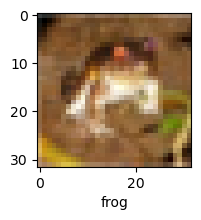

In [13]:
plot_sample(X_train,y_train,0)

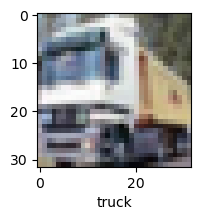

In [14]:
plot_sample(X_train,y_train,1)

In [17]:
X_train=X_train/255
X_test= X_test/255

### Model Building and Training using ANN

In [18]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 21s 14ms/step - loss: 1.8143 - accuracy: 0.3528
Epoch 2/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.6240 - accuracy: 0.4257
Epoch 3/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5435 - accuracy: 0.4562
Epoch 4/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4833 - accuracy: 0.4790
Epoch 5/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4352 - accuracy: 0.4951


In [19]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.4905 - accuracy: 0.4701


[1.4905133247375488, 0.4700999855995178]

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 2s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.54      0.56      1000
           1       0.70      0.47      0.56      1000
           2       0.44      0.23      0.31      1000
           3       0.30      0.47      0.37      1000
           4       0.39      0.49      0.43      1000
           5       0.32      0.47      0.38      1000
           6       0.64      0.29      0.40      1000
           7       0.53      0.55      0.54      1000
           8       0.64      0.57      0.61      1000
           9       0.53      0.61      0.57      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.47     10000
weighted avg       0.51      0.47      0.47     10000



In [ ]:
#Softmax Function: Normalizing in the range of 0 & 1 such that total sum is 1
# 1 : 0.45
# 2 : 0.67
    
# 1 : (0.45)/(0.45+0.67)

In [21]:
(0.45)/(0.45+0.67)

0.40178571428571425

In [22]:
(0.67)/(0.45+0.67)

0.5982142857142857

In [24]:
cnn = models.Sequential([
    #cnn : Detecting features in the image
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [27]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [28]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4593 - accuracy: 0.4737
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1082 - accuracy: 0.6108
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9905 - accuracy: 0.6551
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9109 - accuracy: 0.6835
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8505 - accuracy: 0.7053
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7990 - accuracy: 0.7229
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7524 - accuracy: 0.7384
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7105 - accuracy: 0.7549
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6775 - accuracy: 0.7651
Epoch 10/10
1563/1563 [==============================] - 12s 7ms/step - l

In [30]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9901 - accuracy: 0.6827


[0.99013751745224, 0.682699978351593]

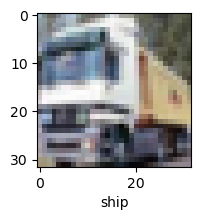

In [32]:
y_test= y_test.reshape(-1,)
plot_sample(X_test,y_test,1)

In [36]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[7.26384678e-05, 2.45072206e-05, 4.19816672e-04, 7.87734568e-01,
        1.12921195e-02, 1.15877204e-01, 1.84086077e-02, 5.40129695e-05,
        6.60658553e-02, 5.07717123e-05],
       [3.12551763e-03, 3.73623222e-02, 1.07924177e-06, 3.48568761e-07,
        4.22811652e-09, 2.89793167e-08, 6.80567638e-08, 3.89020621e-10,
        9.58096802e-01, 1.41386536e-03],
       [2.80266888e-02, 3.89984518e-01, 3.68798617e-04, 1.15096075e-02,
        9.63054190e-04, 5.26639028e-03, 7.38243631e-04, 4.07106103e-03,
        4.98242497e-01, 6.08291067e-02],
       [4.26571280e-01, 1.75205839e-03, 1.50026230e-03, 6.37334259e-03,
        1.56684648e-02, 2.27341501e-04, 3.47630034e-04, 5.97219987e-05,
        5.46038687e-01, 1.46123755e-03],
       [4.72391690e-08, 2.41431030e-06, 2.26820167e-03, 2.93033924e-02,
        6.66936576e-01, 1.41369796e-03, 2.99911290e-01, 6.28250855e-05,
        1.01340163e-04, 2.03938072e-07]], dtype=float32)

In [40]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [41]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

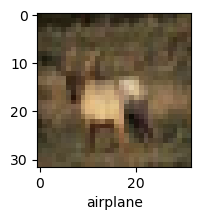

In [44]:
plot_sample(X_test,y_test,3)

In [45]:
classes[y_classes[3]]

'ship'

In [46]:
print("Classification Report: \n",classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.63      0.71      1000
           1       0.89      0.66      0.76      1000
           2       0.70      0.49      0.58      1000
           3       0.51      0.50      0.50      1000
           4       0.69      0.62      0.66      1000
           5       0.54      0.67      0.60      1000
           6       0.83      0.72      0.77      1000
           7       0.67      0.79      0.72      1000
           8       0.74      0.86      0.79      1000
           9       0.61      0.89      0.73      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000

